In [9]:
import numpy as np
import pandas as pd
df = pd.read_excel("life_data.xlsx")
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', '의료시설 수', '대중교통만족도', '문화시설 수', '경제력',
       '주택가격 안정화지수', '1인당 녹지 면적', '전체녹지', '상업시설 수', '주거환경만족도'],
      dtype='object')

In [10]:


def pearson_correlation(x, y):
    # 입력 변수 x와 y의 길이가 동일한지 확인
    if len(x) != len(y):
        raise ValueError("두 변수는 길이가 동일해야 합니다.")

    n = len(x)  # 변수의 개수

    # 평균 계산
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # 분자 계산
    numerator = sum((x - mean_x) * (y - mean_y))

    # 분모 계산
    denominator = np.sqrt(sum((x - mean_x)**2) * sum((y - mean_y)**2))

    # 피어슨 상관계수 계산
    correlation = numerator / denominator

    return correlation

# 예시 데이터


label_name = '주거환경만족도'
cols = [ '의료시설 수', '대중교통만족도', '문화시설 수', '경제력', '주택가격 안정화지수', '1인당 녹지 면적', '전체녹지', '상업시설 수', '주거환경만족도']

for i in range(len(cols)):
    x = df[cols[i]]
    y = df[label_name]
    correlation_coefficient = pearson_correlation(x, y)
    print("피어슨 상관계수","(",cols[i],"):", correlation_coefficient)


피어슨 상관계수 ( 의료시설 수 ): -0.22118048241224303
피어슨 상관계수 ( 대중교통만족도 ): -0.024585098862924027
피어슨 상관계수 ( 문화시설 수 ): -0.08326167148777945
피어슨 상관계수 ( 경제력 ): -0.04180423063953908
피어슨 상관계수 ( 주택가격 안정화지수 ): -0.07884179043161774
피어슨 상관계수 ( 1인당 녹지 면적 ): 0.02193903637970422
피어슨 상관계수 ( 전체녹지 ): -0.13763641573897403
피어슨 상관계수 ( 상업시설 수 ): 0.10323444634398407
피어슨 상관계수 ( 주거환경만족도 ): 1.0


In [11]:
df = pd.DataFrame(df)
df_a = df.iloc[:,2:]
df_a

,의료시설 수,대중교통만족도,문화시설 수,경제력,주택가격 안정화지수,1인당 녹지 면적,전체녹지,상업시설 수,주거환경만족도
0,2302,6.29,12,424.83588,0.750268,26.684098,1440374,2249993,5.97
1,2343,6.60,12,452.95609,0.107991,26.890935,797721,2320955,6.10
2,2369,6.41,13,465.72573,9.600863,26.963048,797721,2320955,5.56
3,2407,6.29,13,491.73068,0.954654,26.990000,797721,2320955,5.89
4,2452,6.98,13,524.59345,2.650602,26.310000,797721,2320955,5.97
...,...,...,...,...,...,...,...,...,...
270,490,6.36,9,38.03053,1.026694,18.930000,187309,2937285,6.16
271,491,3.34,9,39.38464,1.829268,18.010000,187309,2937285,6.59
272,498,6.74,11,41.02403,4.191617,18.230000,187309,2937285,6.44
273,511,6.83,11,43.66141,0.957854,18.520000,187309,2937285,6.48


In [12]:
import matplotlib.pyplot as plt

# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

# 확인 이후
plt.rc('font', family='Malgun Gothic')

['cmtt10', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeTwoSym', 'DejaVu Sans', 'STIXGeneral', 'STIXNonUnicode', 'cmss10', 'DejaVu Sans', 'cmr10', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'DejaVu Serif', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Serif Display', 'STIXGeneral', 'cmsy10', 'STIXGeneral', 'STIXGeneral', 'STIXNonUnicode', 'cmmi10', 'cmb10', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'STIXNonUnicode', 'cmex10', 'Bookman Old Style', 'Bookshelf Symbol 7', 'Maiandra GD', 'Malgun Gothic', 'Bodoni MT', 'High Tower Text', 'Gill Sans MT', 'Perpetua', 'Calibri', 'Dubai', 'Constantia', 'Gill Sans Ultra Bold', 'HCR Dotum', 'Sitka Small', 'Bodoni MT', 'Freestyle Script', 'Constantia', 'Gabriola', 'Franklin Gothic Book', 'Leelawadee', 'Franklin Gothic Medium', 'Lucida Sans Typewriter', 'Palatino

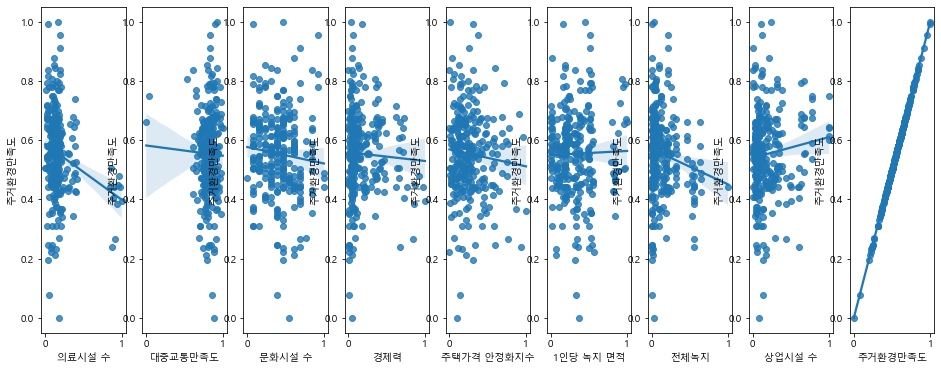

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 데이터프레임 생성 코드가 누락되어 있다면 추가해주세요.

scaler = MinMaxScaler()
df_a_normalized = scaler.fit_transform(df_a)

df_a_normalized = pd.DataFrame(df_a_normalized, columns=df_a.columns)

plt.figure(figsize=(16, 6))
for i, name in enumerate(cols):
    ax = plt.subplot(1, 9, i+1)
    sns.regplot(x=name, y=cols[8], data=df_a_normalized, ax=ax, fit_reg=True)

plt.show()


[-0.29 -0.11  0.    0.12 -0.01  0.04  0.01]
0.67


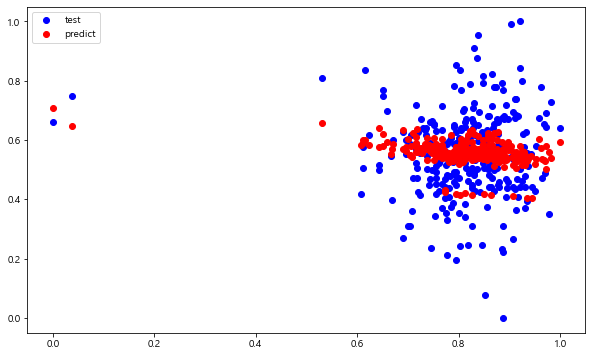

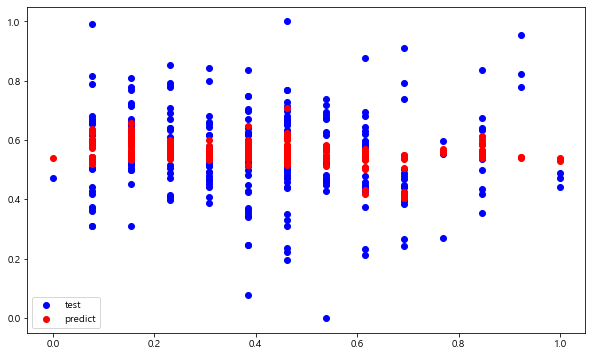

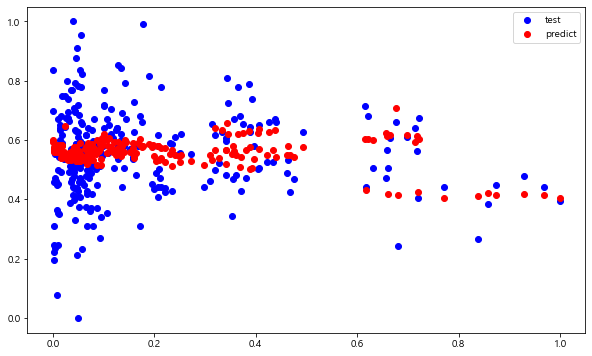

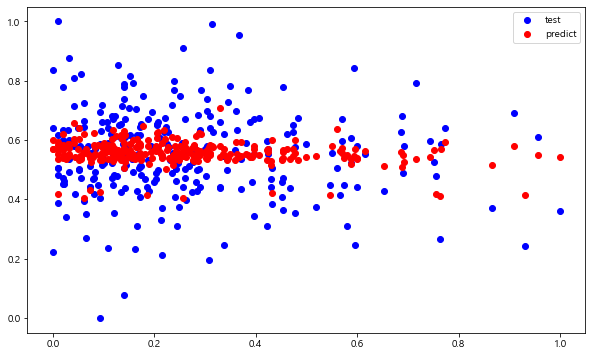

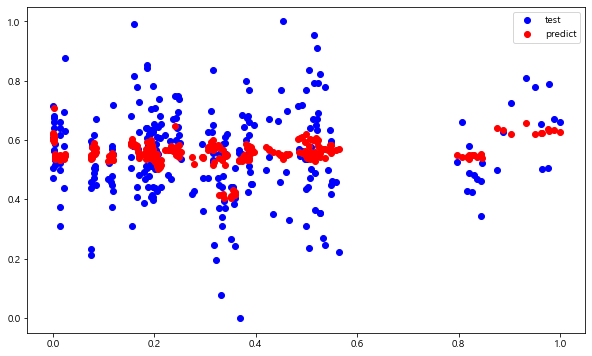

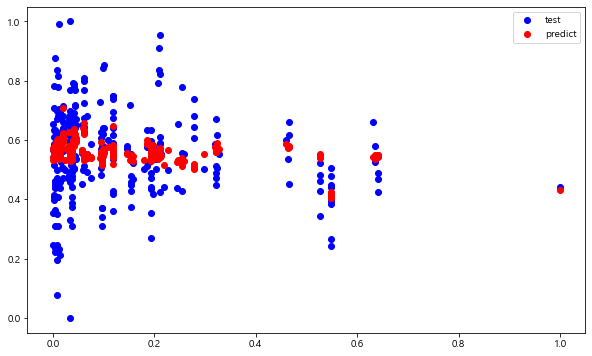

오차율:  0.14192022876682991
회귀 계수 (가중치):
의료시설 수: -0.29
대중교통만족도: -0.11
문화시설 수: 0.00
경제력: 0.12
주택가격 안정화지수: -0.01
1인당 녹지 면적: 0.04
전체녹지: 0.01


In [14]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

x_data = df_a_normalized[cols[:7]]
y_data = df_a_normalized['주거환경만족도']
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(np.round(lr.coef_, 2))
print(np.round(lr.intercept_, 2))
pred = lr.predict(x_data)


plt.figure(figsize=(10, 6))
plt.scatter(x_data[cols[1]], y_data,c='b',label='test')  
plt.scatter(x_data[cols[1]], pred,c='r',label='predict')  
plt.legend() 
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x_data[cols[2]], y_data,c='b',label='test')  
plt.scatter(x_data[cols[2]], pred,c='r',label='predict')  
plt.legend() 
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x_data[cols[3]], y_data,c='b',label='test')  
plt.scatter(x_data[cols[3]], pred,c='r',label='predict')  
plt.legend() 
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x_data[cols[4]], y_data,c='b',label='test')  
plt.scatter(x_data[cols[4]], pred, c='r',label='predict')  
plt.legend() 
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x_data[cols[5]], y_data,c='b',label='test')  
plt.scatter(x_data[cols[5]], pred, c='r',label='predict')  
plt.legend() 
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x_data[cols[6]], y_data,c='b',label='test')  
plt.scatter(x_data[cols[6]], pred, c='r',label='predict')  
plt.legend() 
plt.show()

rmse = np.sqrt(mean_squared_error(y_data, pred))
print("오차율: ",rmse)

print("회귀 계수 (가중치):")
for i, col in enumerate(cols[:7]):
    print("{}: {:.2f}".format(col, lr.coef_[i]))